In [1]:
import pandas as pd

# CSV files may use tabs instead of commas
male = pd.read_csv("nhanes_adult_male_bmx_2020.csv", sep=",", engine="python", comment="#")
female = pd.read_csv("nhanes_adult_female_bmx_2020.csv", sep=",", engine="python", comment="#")

# Show data
display(male.head())
display(female.head())

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0


,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2


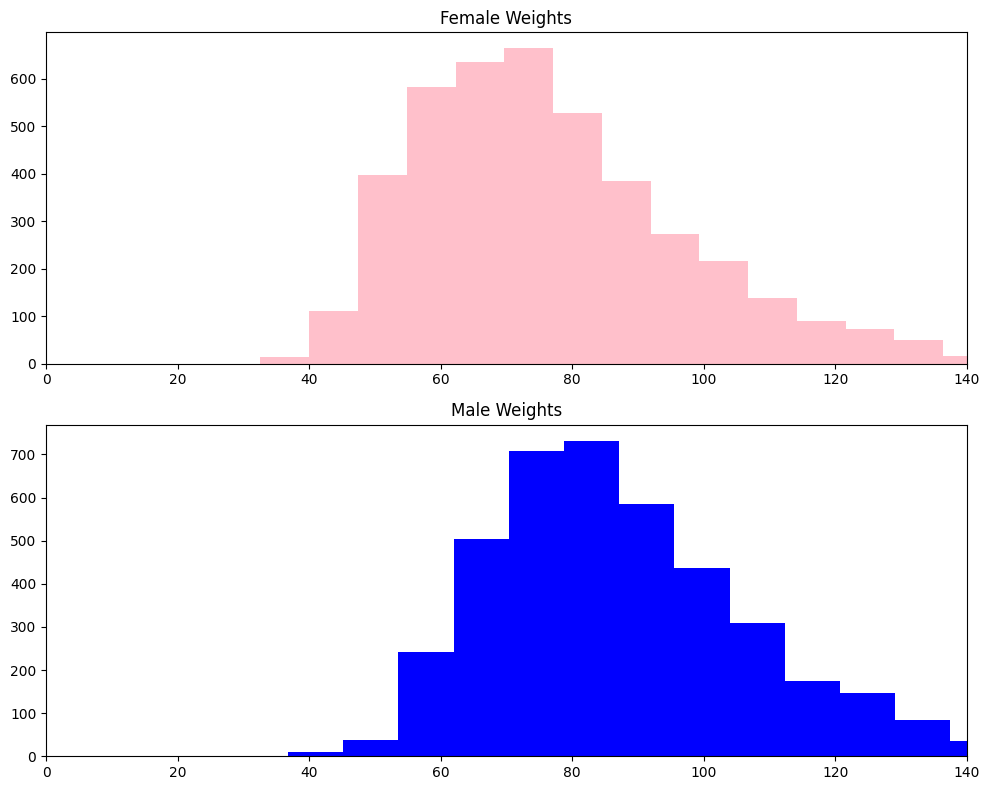

In [2]:
import matplotlib.pyplot as plt

# Male & Female weights
male_weights = male['BMXWT']
female_weights = female['BMXWT']

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.hist(female_weights, bins=20, color='pink')
ax1.set_title("Female Weights")
ax1.set_xlim(0, 140)

ax2.hist(male_weights, bins=20, color='blue')
ax2.set_title("Male Weights")
ax2.set_xlim(0, 140)

plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16720\100521870.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])


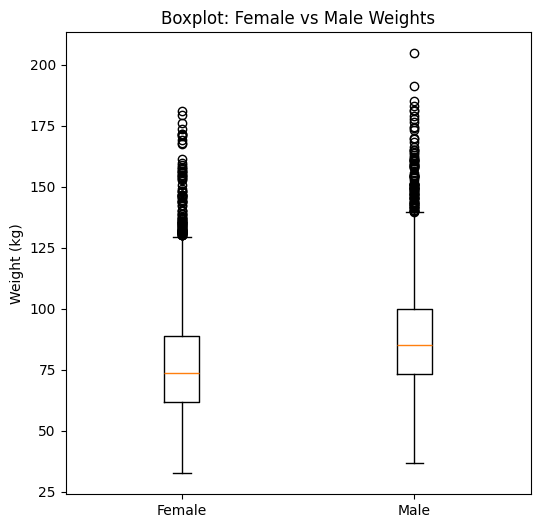

In [3]:
plt.figure(figsize=(6, 6))
plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])
plt.title("Boxplot: Female vs Male Weights")
plt.ylabel("Weight (kg)")
plt.show()

In [4]:
print("Male Weight Stats:")
print(male_weights.describe())
print("\nFemale Weight Stats:")
print(female_weights.describe())

print("\nSkewness:")
print("Male:", male_weights.skew())
print("Female:", female_weights.skew())

Male Weight Stats:
count    4081.000000
mean       88.364543
std        21.421561
min        36.800000
25%        73.300000
50%        85.000000
75%        99.800000
max       204.600000
Name: BMXWT, dtype: float64

Female Weight Stats:
count    4221.000000
mean       77.403791
std        21.545061
min        32.600000
25%        61.600000
50%        73.600000
75%        88.700000
max       180.900000
Name: BMXWT, dtype: float64

Skewness:
Male: 0.9846430235310972
Female: 1.033728460112216


In [5]:
# Height in meters (currently in cm)
female_height_m = female['BMXHT'] / 100
female_bmi = female['BMXWT'] / (female_height_m ** 2)

# Add BMI as new column
female['BMI'] = female_bmi

# Display updated data
female.head()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,BMI
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9,37.835041
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1,39.069720
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0,28.092655
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5,24.904378
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2,23.178791


In [6]:
# Standardization (z-score): All columns of female
zfemale = (female - female.mean()) / female.std()

# Show first few rows
zfemale.head()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,BMI
0,0.914187,0.008949,-0.567327,1.132854,0.550780,1.083033,1.115652,0.996850
1,0.635701,-1.052944,-1.078804,-1.293338,1.032096,1.044632,0.265058,1.156038
2,-0.204399,0.150535,0.583494,0.261913,-0.162280,-0.190624,-0.372889,-0.259244
3,-0.728881,-0.387491,0.839232,-0.764553,-0.661422,-0.523439,-0.459097,-0.670311
4,-1.021292,-0.783931,-0.609950,-0.982288,-0.786207,-1.067464,-1.453374,-0.892793


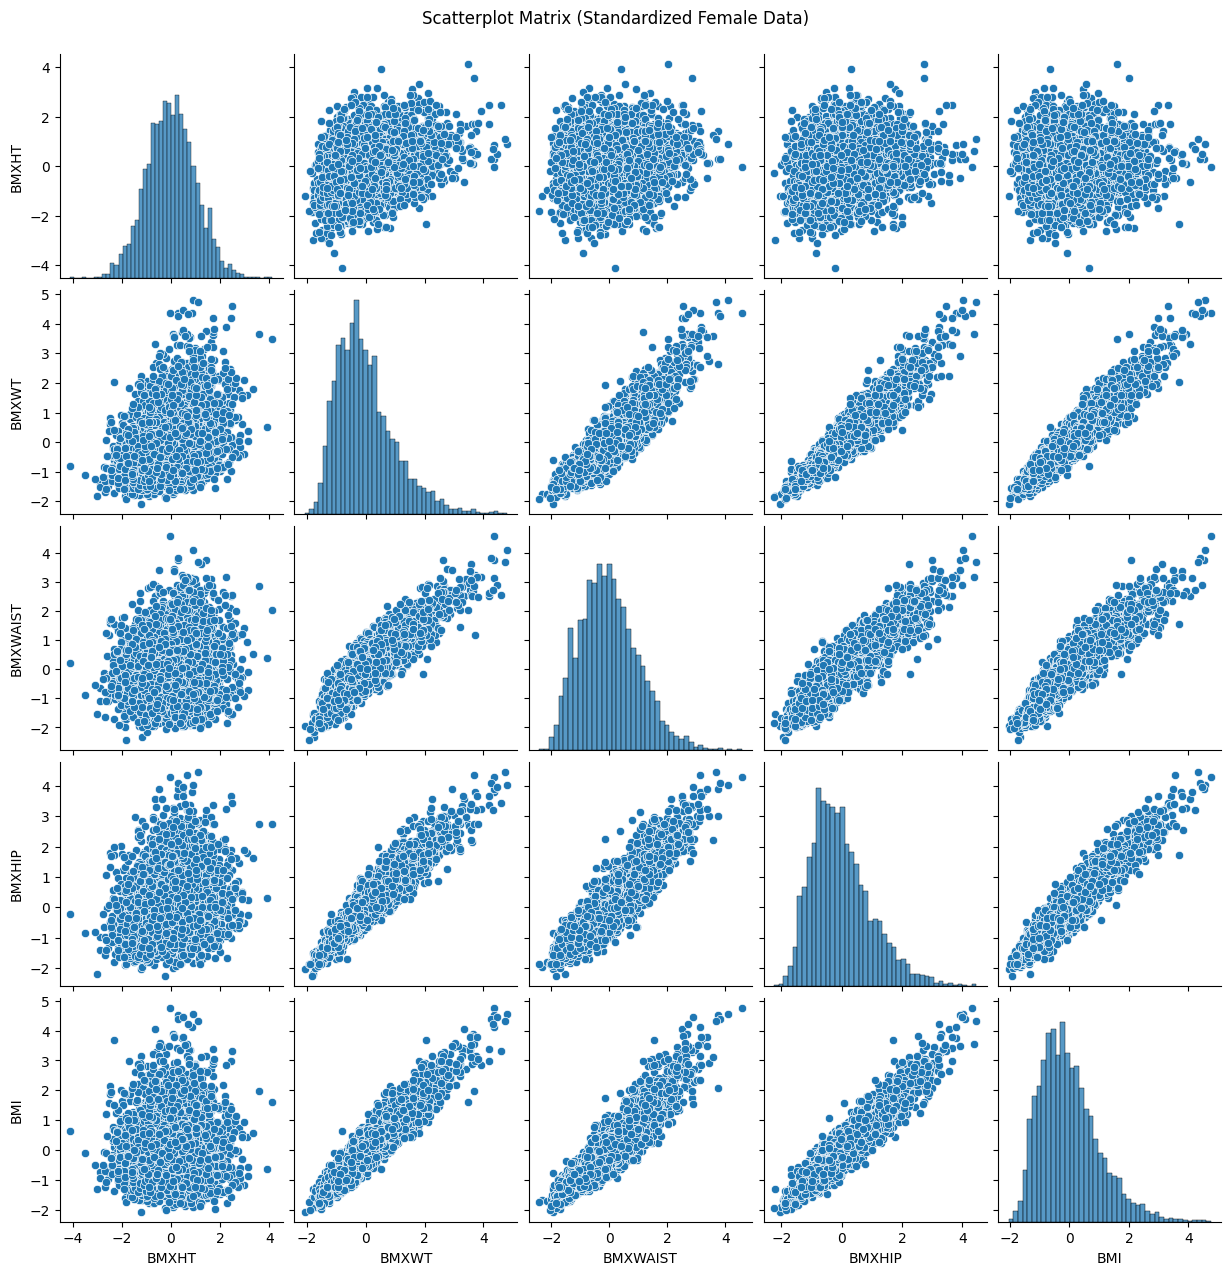

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
selected = zfemale[['BMXHT', 'BMXWT', 'BMXWAIST', 'BMXHIP', 'BMI']]

# Scatterplot matrix (pairplot)
sns.pairplot(selected)
plt.suptitle("Scatterplot Matrix (Standardized Female Data)", y=1.02)
plt.show()

In [8]:
# Pearson correlation
print("Pearson Correlation:")
print(selected.corr(method='pearson'))

# Spearman correlation
print("\nSpearman Correlation:")
print(selected.corr(method='spearman'))

Pearson Correlation:
             BMXHT     BMXWT  BMXWAIST    BMXHIP       BMI
BMXHT     1.000000  0.345496  0.126547  0.202895  0.033077
BMXWT     0.345496  1.000000  0.904550  0.946553  0.945900
BMXWAIST  0.126547  0.904550  1.000000  0.897407  0.921198
BMXHIP    0.202895  0.946553  0.897407  1.000000  0.944199
BMI       0.033077  0.945900  0.921198  0.944199  1.000000

Spearman Correlation:
             BMXHT     BMXWT  BMXWAIST    BMXHIP       BMI
BMXHT     1.000000  0.338860  0.108587  0.205405  0.019897
BMXWT     0.338860  1.000000  0.900169  0.946634  0.937999
BMXWAIST  0.108587  0.900169  1.000000  0.888037  0.923114
BMXHIP    0.205405  0.946634  0.888037  1.000000  0.934196
BMI       0.019897  0.937999  0.923114  0.934196  1.000000


In [9]:
# Female ratios
female['Waist_Height_Ratio'] = female['BMXWAIST'] / female['BMXHT']
female['Waist_Hip_Ratio'] = female['BMXWAIST'] / female['BMXHIP']

# Male ratios
male['Waist_Height_Ratio'] = male['BMXWAIST'] / male['BMXHT']
male['Waist_Hip_Ratio'] = male['BMXWAIST'] / male['BMXHIP']

# Preview new columns
female[['Waist_Height_Ratio', 'Waist_Hip_Ratio']].head()

,Waist_Height_Ratio,Waist_Hip_Ratio
0,0.735955,0.934972
1,0.675180,0.821514
2,0.570720,0.866290
3,0.574968,0.896040
4,0.473480,0.791351


C:\Users\lenovo\AppData\Local\Temp\ipykernel_16720\150000112.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


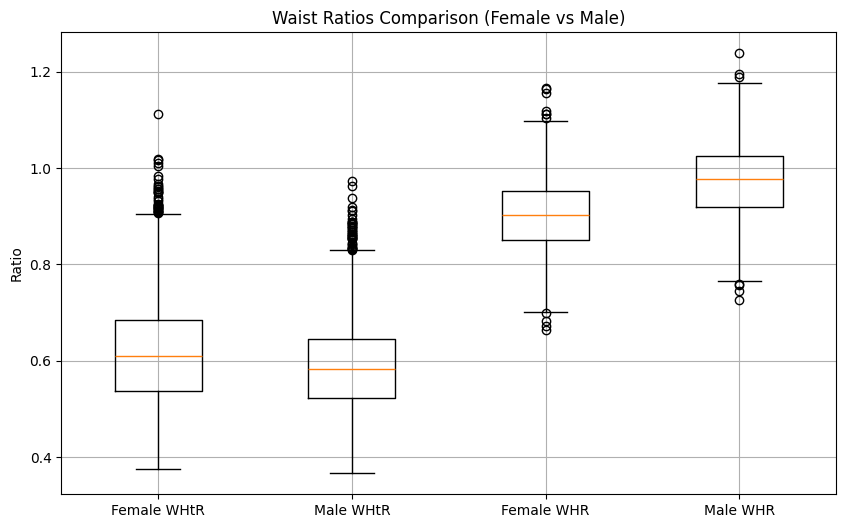

In [10]:
import matplotlib.pyplot as plt

# Prepare data
waist_height = [female['Waist_Height_Ratio'], male['Waist_Height_Ratio']]
waist_hip = [female['Waist_Hip_Ratio'], male['Waist_Hip_Ratio']]

# Combine all for 4-box boxplot
data = waist_height + waist_hip
labels = ['Female WHtR', 'Male WHtR', 'Female WHR', 'Male WHR']

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.title("Waist Ratios Comparison (Female vs Male)")
plt.ylabel("Ratio")
plt.grid(True)
plt.show()

Step 11: Advantages and Disadvantages¶
✅ BMI (Body Mass Index)
Advantages:

Easy to calculate using just weight and height
Commonly used and understood
Good for large-scale population health analysis
Disadvantages:

Doesn't account for muscle vs. fat
Can misclassify athletes as overweight
Doesn't reflect fat distribution
✅ Waist-to-Height Ratio (WHtR)
Advantages:

Better indicator of visceral fat than BMI
More predictive of health risks like heart disease
Same cut-off values for both genders
Disadvantages:

Requires accurate waist and height measurements
Less popular/known than BMI
✅ Waist-to-Hip Ratio (WHR)
Advantages:

Reflects fat distribution
Can indicate central obesity risks
Disadvantages:

More complex to measure properly
Can vary due to body structure

In [11]:
# Add BMI column for male participants
male['BMI'] = male['BMXWT'] / ((male['BMXHT'] / 100) ** 2)

In [12]:
print("🔽 5 Males with Lowest BMI:")
display(male.sort_values('BMI').head(5))

print("\n🔼 5 Males with Highest BMI:")
display(male.sort_values('BMI', ascending=False).head(5))

🔽 5 Males with Lowest BMI:


,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,Waist_Height_Ratio,Waist_Hip_Ratio,BMI
2570,36.8,157.1,37.5,40.2,19.0,79.5,80.0,0.509230,1.006289,14.910611
2061,47.9,178.0,38.2,43.0,22.5,82.4,70.2,0.394382,0.851942,15.118041
1481,49.5,179.1,38.0,44.3,22.4,82.0,67.4,0.376326,0.821951,15.431709
2436,46.9,174.2,38.2,40.3,22.8,80.1,67.2,0.385763,0.838951,15.455268
463,41.2,162.6,34.3,39.1,22.7,80.0,66.2,0.407134,0.827500,15.583182



🔼 5 Males with Highest BMI:


,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,Waist_Height_Ratio,Waist_Hip_Ratio,BMI
1880,204.6,175.4,40.2,38.1,53.4,168.4,170.8,0.973774,1.014252,66.503798
44,191.4,175.8,39.6,46.7,53.6,157.0,161.6,0.919226,1.029299,61.930444
544,159.6,162.3,36.4,39.3,46.4,158.3,152.2,0.937770,0.961466,60.589288
3080,181.4,174.8,43.5,45.0,49.8,153.4,157.9,0.903318,1.029335,59.368274
362,174.4,173.4,40.2,39.5,46.2,154.3,155.1,0.894464,1.005185,58.002711


In [13]:
print("🔽 5 Females with Lowest BMI:")
display(female.sort_values('BMI').head(5))

print("\n🔼 5 Females with Highest BMI:")
display(female.sort_values('BMI', ascending=False).head(5))

print("\n🔽 5 Males with Lowest BMI:")
display(male.sort_values('BMI').head(5))

print("\n🔼 5 Males with Highest BMI:")
display(male.sort_values('BMI', ascending=False).head(5))

🔽 5 Females with Lowest BMI:


,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,BMI,Waist_Height_Ratio,Waist_Hip_Ratio
262,32.6,151.5,32.4,33.4,20.4,77.3,64.7,14.203401,0.427063,0.836999
3478,36.9,158.8,32.0,38.4,19.0,80.2,62.7,14.632730,0.394836,0.781796
2126,44.3,172.9,37.5,39.0,20.0,83.0,68.8,14.818824,0.397918,0.828916
2753,37.7,158.3,35.5,38.8,19.8,74.0,66.2,15.044561,0.418193,0.894595
1209,42.7,166.4,35.8,38.7,20.3,80.6,68.7,15.421309,0.412861,0.852357



🔼 5 Females with Highest BMI:


,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,BMI,Waist_Height_Ratio,Waist_Hip_Ratio
1096,171.4,159.9,35.9,36.6,48.3,176.6,178.0,67.036895,1.113196,1.007928
1104,180.9,166.4,41.0,43.0,53.9,172.0,169.5,65.332898,1.018630,0.985465
1472,171.1,162.1,42.7,43.4,57.2,170.4,163.8,65.115440,1.010487,0.961268
3022,173.4,163.7,40.0,33.5,51.5,171.4,149.0,64.707070,0.910202,0.869312
2268,168.9,162.2,40.4,34.0,46.0,173.3,164.9,64.198954,1.016646,0.951529



🔽 5 Males with Lowest BMI:


,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,Waist_Height_Ratio,Waist_Hip_Ratio,BMI
2570,36.8,157.1,37.5,40.2,19.0,79.5,80.0,0.509230,1.006289,14.910611
2061,47.9,178.0,38.2,43.0,22.5,82.4,70.2,0.394382,0.851942,15.118041
1481,49.5,179.1,38.0,44.3,22.4,82.0,67.4,0.376326,0.821951,15.431709
2436,46.9,174.2,38.2,40.3,22.8,80.1,67.2,0.385763,0.838951,15.455268
463,41.2,162.6,34.3,39.1,22.7,80.0,66.2,0.407134,0.827500,15.583182



🔼 5 Males with Highest BMI:


,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,Waist_Height_Ratio,Waist_Hip_Ratio,BMI
1880,204.6,175.4,40.2,38.1,53.4,168.4,170.8,0.973774,1.014252,66.503798
44,191.4,175.8,39.6,46.7,53.6,157.0,161.6,0.919226,1.029299,61.930444
544,159.6,162.3,36.4,39.3,46.4,158.3,152.2,0.937770,0.961466,60.589288
3080,181.4,174.8,43.5,45.0,49.8,153.4,157.9,0.903318,1.029335,59.368274
362,174.4,173.4,40.2,39.5,46.2,154.3,155.1,0.894464,1.005185,58.002711


Lowest & Highest BMI Records
Below are the 5 female and 5 male participants with the lowest and highest BMI, respectively. This helps in identifying outliers and understanding extreme cases.

Conclusion
BMI is easy to calculate but doesn’t always reflect fat distribution.
WHtR (Waist-to-Height Ratio) gave better insights about central obesity.
Males generally had higher BMI, but females had more variation in WHR.
Scatterplots and boxplots helped us visualize key differences.
Outliers found in top/bottom 5 BMI cases may indicate health issues or data entry errors.

Final Remarks
This capstone project used real health survey data to explore body composition patterns across males and females. We calculated BMI, standardized the data, analyzed correlation, visualized distributions, and interpreted central obesity metrics using WHtR and WHR. The project showcased how data science tools like Pandas, Matplotlib, and Seaborn can be applied to meaningful real-world health datasets